# What exactly is a variable?

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

A variable is any characteristic, number, or quantity that can be measured or counted. They are called "variables" because the values they take vary. The following are examples of variables:

- Age (21, 35, 62, ...)

- Gender (male, female)

- Income (GBP 20000, GBP 35000, GBP 45000, ...)

- House price (GBP 350000, GBP 570000, ...)

- Country of birth (China, Russia, Costa Rica, etc.)

- Eye colour (brown, green, blue, ...)

- Vehicle make (Ford, Volkswagen, ...)

Most variables in a data set can be classified into one of two major types:

- **Numerical variables** 
- **Categorical variables**

===================================================================================


## Categorical Variables

The values of a categorical variable are selected from a group of **categories**, also called **labels**. Examples are gender (male or female) and marital status (single, married, divorced, or widowed). Other examples of categorical variables include:

- Intended use of loan (debt-consolidation, car purchase, wedding expenses, etc.)

- Mobile network provider (Vodafone, Orange,...)

- Postcode

Categorical variables can be further categorized into:

- **Ordinal Variables**
- **Nominal variables**


## Ordinal variables

Ordinal variables are categorical variables whose categories can be meaningfully ordered. For example:

- Student's grade on an exam (A, B, C, or Fail).

- Days of the week, where Monday is 1 and Sunday is 7.

- Educational level, with the categories of elementary school, high school, college graduate, and PhD ranked from 1 to 4.  

## Nominal variables

There is no inherent order in the labels for nominal variables. Country of birth, for example, has nominal values of Argentina, England, Germany, and so on. Nominal variables include the following:

- Car color (blue, gray, silver, ...)

- Vehicle make (Citroen, Peugeot, ...)

- City (Manchester, London, Chester, ...)

In principle, there is nothing that indicates an intrinsic order to the labels, and in fact, they are all equal.

**To be considered:**

Sometimes categorical variables are coded as numbers (e.g., gender may be coded as 0 for males and 1 for females). The variable is still categorical, despite the use of numbers.

In a similar way, individuals in a survey may be coded with a number that uniquely identifies them (for example, to avoid displaying personal information). This number is really a label, and the variable is then categorical. The number has no importance other than to allow the observation to be uniquely identified.

When working with a dataset in a commercial setting, it's ideal if the data comes with a dictionary that specifies whether the numbers in the variables are to be considered categories or numerical. If the numbers are categories, the dictionary will explain what each variable's value signifies.

=============================================================================

## In this demo: Peer-to-peer lending (Finance)

In this demo, we will use a toy data set that simulates data from a peer-to-peer finance company.

To obtain the data, go to the lecture **Download datasets** in **Section 2**. This is a toy dataset that I created and comes within the Datasets.zip file that you can find in this lecture.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's load the dataset.

# Variable definitions:
#----------------------
# loan_purpose: intended use of the loan
# market: the risk market assigned to the borrower (based in their financial situation)
# householder: whether the borrower owns or rents their property

data = pd.read_csv('../Datasets/loan.csv')

data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [3]:
# Let's inspect the variable householder,
# which indicates whether the borrowers own their home,
# or if they are renting, among other things.

data['householder'].unique()

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

Text(0, 0.5, 'Number of customers')

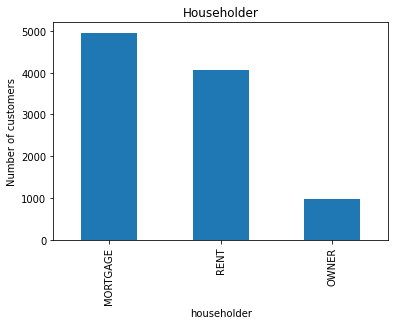

In [4]:
# Let's make a bar plot with the number of loans
# disbursed in each category of home ownership.

# The code below counts the number of observations (borrowers)
# in each category and then makes a bar plot.

fig = data['householder'].value_counts().plot.bar()
fig.set_title('Householder')
fig.set_ylabel('Number of customers')

The majority of the borrowers either own their house with a mortgage or rent their property. A few borrowers own their homes completely.

In [5]:
data['householder'].value_counts()

householder
MORTGAGE    4957
RENT        4055
OWNER        988
Name: count, dtype: int64

In [6]:
# The "loan_purpose" variable is another categorical variable
# that indicates how the borrowers intend to use the
# money they are borrowing. For example, to improve their
# house, or to cancel previous debt.

data['loan_purpose'].unique()

array(['Debt consolidation', 'Car purchase', 'Other', 'Home improvements',
       'Moving home', 'Health', 'Holidays', 'Wedding'], dtype=object)

Debt consolidation means that the borrower will use the loan to cancel previous debts; car purchase means that the borrower will use the money to buy a car; and so on. It gives an idea of the intended use of the loan.

Text(0, 0.5, 'Number of customers')

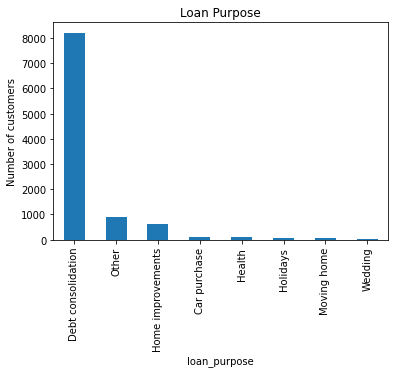

In [7]:
# Let's make a bar plot with the number of borrowers
# in each category.

# The code below counts the number of observations (borrowers)
# per category and then makes a plot.

fig = data['loan_purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

The majority of debtors plan to use the money to "consolidate debt." This is a common occurrence. The borrowers want to consolidate all of their debts from various financial products into a single debt, which will be the new loan they will receive from the peer-to-peer organization. This loan will normally provide a benefit to the borrower, such as reduced interest rates or a longer repayment time than a credit card, for example.

In [8]:
# Let's look at one additional categorical variable:
# "market", which represents the risk market or risk band
# assigned to the borrower.

data['market'].unique()

array(['C', 'B', 'A', 'E', 'D'], dtype=object)

Text(0, 0.5, 'Number of customers')

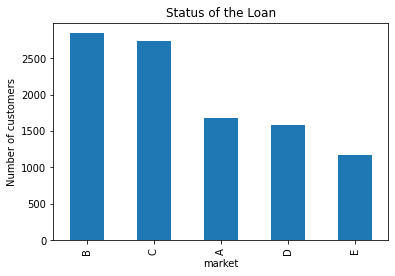

In [9]:
# Let's make a bar plot with the number of borrowers
# per category.

fig = data['market'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

Most customers are assigned to markets B and C. A and B are lower risk customers, and E is the highest risk customer. The higher the risk, the more likely the customer is to default; thus, the finance companies charge higher interest rates on those loans.

In [10]:
# Finally, let's look at a variable that is numerical,
# but its numbers have no real meaning.

data['customer_id'].head()

0    0
1    1
2    2
3    3
4    4
Name: customer_id, dtype: int64

Each id corresponds to a single consumer. This number is assigned to identify the client in the event that it is needed, while guaranteeing confidentiality and data protection.

In [11]:
# The variable has as many different id values as customers:
# in this case 10000.

len(data['customer_id'].unique())

10000

**That is all for this demonstration. I hope you enjoyed the notebook, and I'll see you in the next one.**